<a href="https://colab.research.google.com/github/2303A51195/AIML-2303A51195/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn

<ipython-input-3-b8684a443fd5>:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(data_path, sep=';', low_memory=False,
<ipython-input-3-b8684a443fd5>:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(data_path, sep=';', low_memory=False,
<ipython-input-3-b8684a443fd5>:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(data_path, sep=';', low_memory=False,


                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

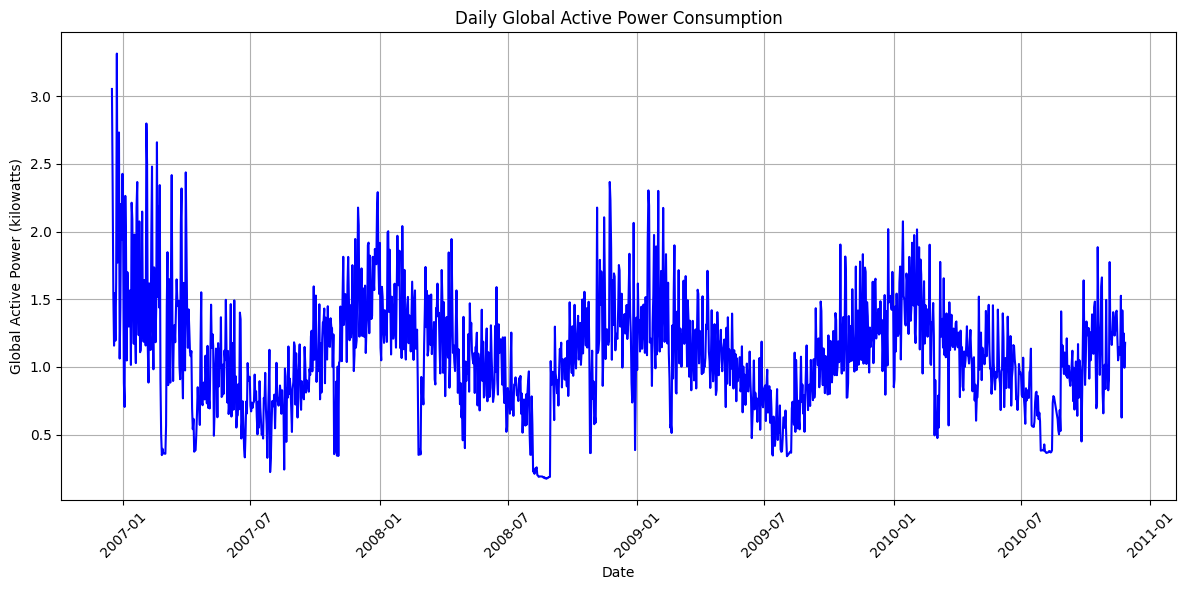

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_path = '/content/sample_data/household_power_consumption.txt'
data = pd.read_csv(data_path, sep=';', low_memory=False,
                   parse_dates={'Datetime': ['Date', 'Time']},
                   infer_datetime_format=True,
                   na_values=['?'],
                   index_col='Datetime')


print(data.head())

data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')

data.dropna(inplace=True)

daily_power = data['Global_active_power'].resample('D').mean()


plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_power, color='blue')
plt.title('Daily Global Active Power Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()